In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
from numpy import mean
from numpy import std
#import the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline

In [3]:
train = pd.read_csv('train.csv').drop('datasetId',axis=1)
test = pd.read_csv('test.csv').drop('datasetId',axis=1)

swell_data = pd.concat([train,test], axis=0) 
swell_data = swell_data.reset_index(drop=True) 

In [4]:
columns = swell_data.columns
print(columns)

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'condition'],
      dtype='object')


In [5]:
cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data[cat_col] = label_encoder.fit_transform(swell_data[cat_col])

In [6]:
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

In [7]:
# get the dataset
def swell_data():   
    return X, y

In [8]:
# get a list of models to evaluate
def get_models_LR():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('LR', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# get a list of models to evaluate
def get_models_LDA():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('LDA', LinearDiscriminantAnalysis())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# get a list of models to evaluate
def get_models_KNN():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('KNN', KNeighborsClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# get a list of models to evaluate
def get_models_CART():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('CART', DecisionTreeClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# get a list of models to evaluate
def get_models_NB():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('NB', GaussianNB())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# get a list of models to evaluate
def get_models_RF():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('RF', RandomForestClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# get a list of models to evaluate
def get_models_Bagg():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier()))]
        models[str(i)] = Pipeline(steps=steps)
    return models
                                                
# get a list of models to evaluate
def get_models_Ada():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('Ada', AdaBoostClassifier(n_estimators=100))]
        models[str(i)] = Pipeline(steps=steps)
    return models       
                                                
# get a list of models to evaluate
def get_models_grad():
    models = dict()
    for i in range(1,35):
        steps = [('SelectKBest', SelectKBest(k=i)), ('grad', GradientBoostingClassifier(n_estimators=100))]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [9]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>1 0.566 (0.001)
>2 0.566 (0.000)
>3 0.550 (0.000)
>4 0.599 (0.002)
>5 0.601 (0.002)
>6 0.602 (0.002)
>7 0.602 (0.002)
>8 0.605 (0.003)
>9 0.608 (0.008)
>10 0.613 (0.004)
>11 0.613 (0.002)
>12 0.614 (0.001)
>13 0.613 (0.001)
>14 0.613 (0.002)
>15 0.616 (0.002)
>16 0.614 (0.002)
>17 0.614 (0.002)
>18 0.613 (0.003)
>19 0.611 (0.002)
>20 0.613 (0.001)
>21 0.613 (0.004)
>22 0.611 (0.001)
>23 0.611 (0.001)
>24 0.611 (0.001)
>25 0.611 (0.002)
>26 0.611 (0.004)
>27 0.613 (0.002)
>28 0.616 (0.003)
>29 0.614 (0.006)
>30 0.615 (0.005)
>31 0.618 (0.004)
>32 0.617 (0.004)
>33 0.619 (0.004)
>34 0.617 (0.003)


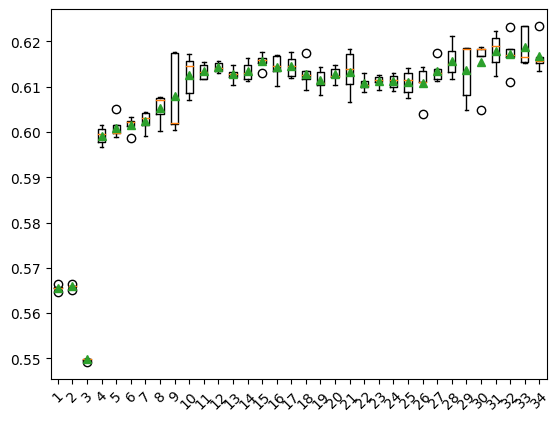

In [10]:
#LR
# define dataset
X, y = swell_data()

# get the models to evaluate
models = get_models_LR()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.548 (0.000)
>2 0.549 (0.000)
>3 0.552 (0.000)
>4 0.593 (0.002)
>5 0.588 (0.002)
>6 0.588 (0.002)
>7 0.592 (0.003)
>8 0.591 (0.002)
>9 0.597 (0.005)
>10 0.604 (0.007)
>11 0.607 (0.002)
>12 0.608 (0.002)
>13 0.617 (0.001)
>14 0.617 (0.001)
>15 0.620 (0.002)
>16 0.623 (0.002)
>17 0.623 (0.002)
>18 0.618 (0.002)
>19 0.618 (0.002)
>20 0.620 (0.001)
>21 0.618 (0.002)
>22 0.618 (0.002)
>23 0.618 (0.001)
>24 0.618 (0.001)
>25 0.618 (0.001)
>26 0.618 (0.002)
>27 0.617 (0.001)
>28 0.615 (0.001)
>29 0.637 (0.002)
>30 0.637 (0.001)
>31 0.638 (0.002)
>32 0.637 (0.001)
>33 0.638 (0.001)
>34 0.638 (0.001)


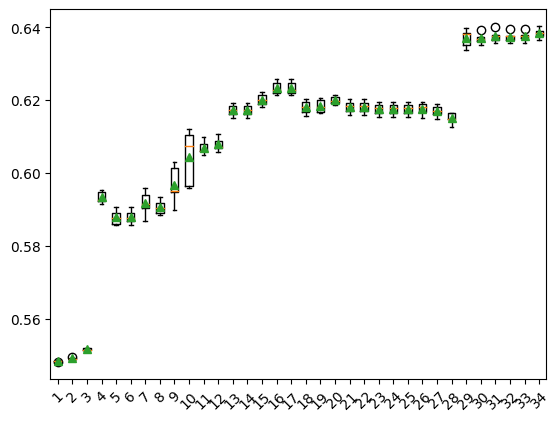

In [11]:
# get the models to evaluate
models = get_models_LDA()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.584 (0.001)
>2 0.911 (0.001)
>3 0.960 (0.000)
>4 0.996 (0.000)
>5 0.993 (0.010)
>6 0.993 (0.010)
>7 0.994 (0.010)
>8 0.976 (0.001)
>9 0.979 (0.006)
>10 0.982 (0.006)
>11 0.977 (0.000)
>12 0.977 (0.000)
>13 0.977 (0.000)
>14 0.978 (0.000)
>15 0.975 (0.001)
>16 0.975 (0.001)
>17 0.975 (0.001)
>18 0.986 (0.000)
>19 0.986 (0.000)
>20 0.986 (0.000)
>21 0.986 (0.000)
>22 0.986 (0.000)
>23 0.986 (0.000)
>24 0.986 (0.000)
>25 0.988 (0.001)
>26 0.988 (0.001)
>27 0.988 (0.001)
>28 0.993 (0.000)
>29 0.994 (0.000)
>30 0.994 (0.000)
>31 0.994 (0.000)
>32 0.994 (0.000)
>33 0.994 (0.000)
>34 0.994 (0.000)


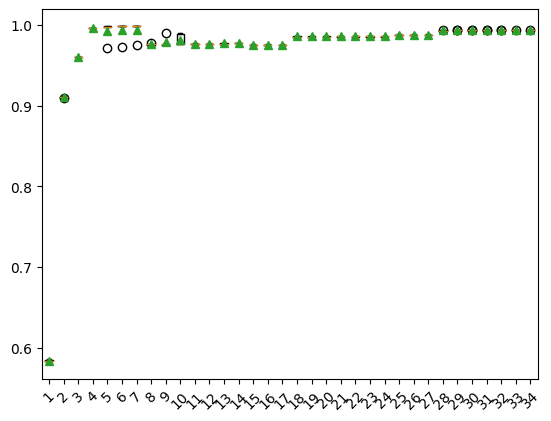

In [12]:
# get the models to evaluate
models = get_models_KNN()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.530 (0.001)
>2 0.911 (0.000)
>3 0.973 (0.000)
>4 0.996 (0.000)
>5 0.998 (0.000)
>6 0.998 (0.000)
>7 0.998 (0.000)
>8 0.998 (0.000)
>9 0.999 (0.000)
>10 0.999 (0.000)
>11 0.999 (0.000)
>12 0.999 (0.000)
>13 0.999 (0.000)
>14 0.999 (0.000)
>15 0.999 (0.000)
>16 0.999 (0.000)
>17 0.999 (0.000)
>18 0.999 (0.000)
>19 0.999 (0.000)
>20 0.999 (0.000)
>21 0.999 (0.000)
>22 0.999 (0.000)
>23 0.999 (0.000)
>24 0.999 (0.000)
>25 0.999 (0.000)
>26 0.999 (0.000)
>27 0.999 (0.000)
>28 0.999 (0.000)
>29 1.000 (0.000)
>30 0.999 (0.000)
>31 0.999 (0.000)
>32 0.999 (0.000)
>33 0.999 (0.000)
>34 0.999 (0.000)


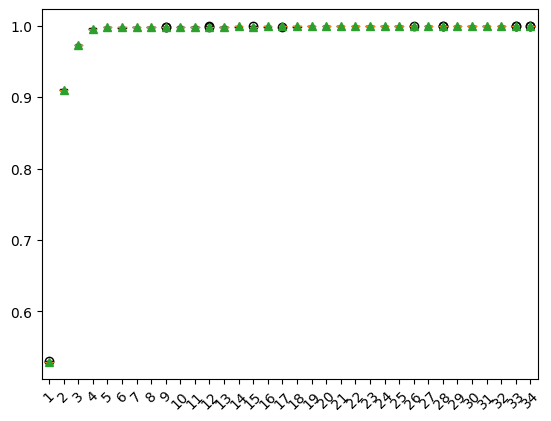

In [13]:
# get the models to evaluate
models = get_models_CART()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.558 (0.001)
>2 0.548 (0.001)
>3 0.528 (0.002)
>4 0.593 (0.002)
>5 0.592 (0.002)
>6 0.585 (0.002)
>7 0.579 (0.002)
>8 0.575 (0.002)
>9 0.570 (0.007)
>10 0.564 (0.005)
>11 0.559 (0.002)
>12 0.555 (0.002)
>13 0.551 (0.002)
>14 0.540 (0.002)
>15 0.549 (0.002)
>16 0.543 (0.002)
>17 0.529 (0.002)
>18 0.561 (0.002)
>19 0.558 (0.002)
>20 0.557 (0.002)
>21 0.549 (0.002)
>22 0.542 (0.002)
>23 0.542 (0.002)
>24 0.542 (0.002)
>25 0.537 (0.002)
>26 0.537 (0.002)
>27 0.536 (0.002)
>28 0.535 (0.002)
>29 0.535 (0.002)
>30 0.535 (0.002)
>31 0.534 (0.002)
>32 0.531 (0.003)
>33 0.520 (0.002)
>34 0.520 (0.002)


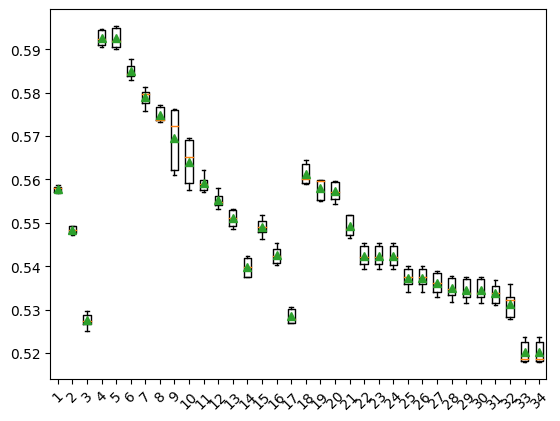

In [14]:
# get the models to evaluate
models = get_models_NB()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.531 (0.001)
>2 0.923 (0.001)
>3 0.986 (0.000)
>4 1.000 (0.000)
>5 1.000 (0.000)
>6 1.000 (0.000)
>7 1.000 (0.000)
>8 1.000 (0.000)
>9 1.000 (0.000)
>10 1.000 (0.000)
>11 1.000 (0.000)
>12 1.000 (0.000)
>13 1.000 (0.000)
>14 1.000 (0.000)
>15 1.000 (0.000)
>16 1.000 (0.000)
>17 1.000 (0.000)
>18 1.000 (0.000)
>19 1.000 (0.000)
>20 1.000 (0.000)
>21 1.000 (0.000)
>22 1.000 (0.000)
>23 1.000 (0.000)
>24 1.000 (0.000)
>25 1.000 (0.000)
>26 1.000 (0.000)
>27 1.000 (0.000)
>28 1.000 (0.000)
>29 1.000 (0.000)
>30 1.000 (0.000)
>31 1.000 (0.000)
>32 1.000 (0.000)
>33 1.000 (0.000)
>34 1.000 (0.000)


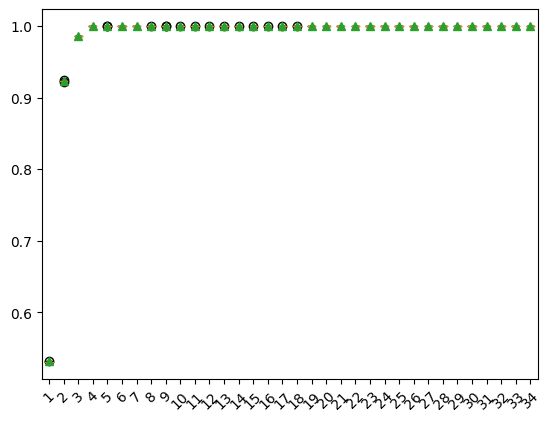

In [15]:
# get the models to evaluate
models = get_models_RF()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.535 (0.000)
>2 0.922 (0.001)
>3 0.982 (0.000)
>4 0.998 (0.000)
>5 0.999 (0.000)
>6 0.999 (0.000)
>7 0.999 (0.000)
>8 0.999 (0.000)
>9 1.000 (0.000)
>10 1.000 (0.000)
>11 1.000 (0.000)
>12 1.000 (0.000)
>13 1.000 (0.000)
>14 1.000 (0.000)
>15 1.000 (0.000)
>16 1.000 (0.000)
>17 1.000 (0.000)
>18 1.000 (0.000)
>19 1.000 (0.000)
>20 1.000 (0.000)
>21 1.000 (0.000)
>22 1.000 (0.000)
>23 1.000 (0.000)
>24 1.000 (0.000)
>25 1.000 (0.000)
>26 1.000 (0.000)
>27 1.000 (0.000)
>28 1.000 (0.000)
>29 1.000 (0.000)
>30 1.000 (0.000)
>31 1.000 (0.000)
>32 1.000 (0.000)
>33 1.000 (0.000)
>34 1.000 (0.000)


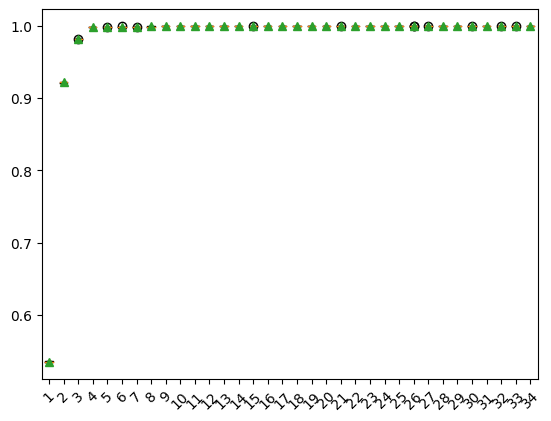

In [16]:
# get the models to evaluate
models = get_models_Bagg()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.617 (0.001)
>2 0.625 (0.004)
>3 0.633 (0.004)
>4 0.616 (0.009)
>5 0.630 (0.010)
>6 0.633 (0.011)
>7 0.628 (0.013)
>8 0.643 (0.004)
>9 0.651 (0.011)
>10 0.654 (0.004)
>11 0.667 (0.006)
>12 0.669 (0.007)
>13 0.680 (0.008)
>14 0.680 (0.008)
>15 0.682 (0.011)
>16 0.682 (0.011)
>17 0.683 (0.011)
>18 0.683 (0.011)
>19 0.673 (0.012)
>20 0.678 (0.008)
>21 0.685 (0.013)
>22 0.685 (0.013)
>23 0.695 (0.009)
>24 0.694 (0.009)
>25 0.686 (0.005)
>26 0.682 (0.011)
>27 0.688 (0.011)
>28 0.668 (0.006)
>29 0.671 (0.008)
>30 0.688 (0.009)
>31 0.693 (0.009)
>32 0.696 (0.010)
>33 0.691 (0.007)
>34 0.691 (0.007)


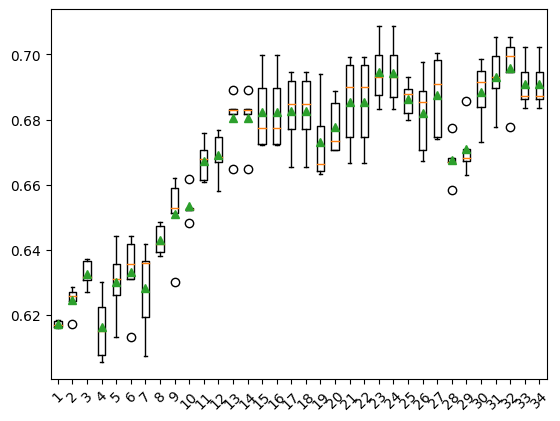

In [17]:
# get the models to evaluate
models = get_models_Ada()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [18]:
# get the models to evaluate
models = get_models_grad()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

>1 0.626 (0.001)
>2 0.676 (0.002)
>3 0.692 (0.002)
>4 0.752 (0.002)
>5 0.779 (0.006)
>6 0.780 (0.010)
>7 0.780 (0.010)
>8 0.801 (0.001)
>9 0.828 (0.006)
>10 0.858 (0.002)
>11 0.860 (0.002)
>12 0.860 (0.003)
>13 0.867 (0.001)
>14 0.868 (0.001)
>15 0.871 (0.002)
>16 0.871 (0.002)
>17 0.871 (0.000)
>18 0.871 (0.000)
>19 0.876 (0.001)
>20 0.884 (0.001)
>21 0.884 (0.002)


KeyboardInterrupt: 